<a href="https://colab.research.google.com/github/Ale0945/Desafio_TelecomX/blob/main/Desafio_TelecomX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

In [4]:
from google.colab import files
uploaded = files.upload()

Saving TelecomX_Data.json to TelecomX_Data (1).json


In [5]:
import json

with open('TelecomX_Data.json', 'r') as f:
    data = json.load(f)

data

[{'customerID': '0002-ORFBO',
  'Churn': 'No',
  'customer': {'gender': 'Female',
   'SeniorCitizen': 0,
   'Partner': 'Yes',
   'Dependents': 'Yes',
   'tenure': 9},
  'phone': {'PhoneService': 'Yes', 'MultipleLines': 'No'},
  'internet': {'InternetService': 'DSL',
   'OnlineSecurity': 'No',
   'OnlineBackup': 'Yes',
   'DeviceProtection': 'No',
   'TechSupport': 'Yes',
   'StreamingTV': 'Yes',
   'StreamingMovies': 'No'},
  'account': {'Contract': 'One year',
   'PaperlessBilling': 'Yes',
   'PaymentMethod': 'Mailed check',
   'Charges': {'Monthly': 65.6, 'Total': '593.3'}}},
 {'customerID': '0003-MKNFE',
  'Churn': 'No',
  'customer': {'gender': 'Male',
   'SeniorCitizen': 0,
   'Partner': 'No',
   'Dependents': 'No',
   'tenure': 9},
  'phone': {'PhoneService': 'Yes', 'MultipleLines': 'Yes'},
  'internet': {'InternetService': 'DSL',
   'OnlineSecurity': 'No',
   'OnlineBackup': 'No',
   'DeviceProtection': 'No',
   'TechSupport': 'No',
   'StreamingTV': 'No',
   'StreamingMovies': 

In [6]:
import pandas as pd

df = pd.DataFrame(data)
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformación

In [7]:
cols_to_expand = ['customer', 'phone', 'internet', 'account']

for col in cols_to_expand:

    expanded = pd.json_normalize(df[col])

    expanded = expanded.add_prefix(f'{col}_')

    df = pd.concat([df.drop(columns=[col]), expanded], axis=1)

df.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [8]:
df.shape

(7267, 21)

In [9]:
df.dtypes

,0
customerID,object
Churn,object
customer_gender,object
customer_SeniorCitizen,int64
customer_Partner,object
customer_Dependents,object
customer_tenure,int64
phone_PhoneService,object
phone_MultipleLines,object
internet_InternetService,object


In [10]:
df.isnull().sum()

,0
customerID,0
Churn,0
customer_gender,0
customer_SeniorCitizen,0
customer_Partner,0
customer_Dependents,0
customer_tenure,0
phone_PhoneService,0
phone_MultipleLines,0
internet_InternetService,0


In [11]:
df.describe()

,customer_SeniorCitizen,customer_tenure,account_Charges.Monthly
count,7267.000000,7267.000000,7267.000000
mean,0.162653,32.346498,64.720098
std,0.369074,24.571773,30.129572
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.425000
50%,0.000000,29.000000,70.300000
75%,0.000000,55.000000,89.875000
max,1.000000,72.000000,118.750000


In [12]:
df['account_Charges.Total'] = pd.to_numeric(df['account_Charges.Total'], errors='coerce')

In [13]:
df['account_Charges.Total'].dtypes

dtype('float64')

In [14]:
for col in df.select_dtypes(include='object').columns:
    print(col, "→", df[col].unique()[:10])

customerID → ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' '0011-IGKFF' '0013-EXCHZ'
 '0013-MHZWF' '0013-SMEOE' '0014-BMAQU' '0015-UOCOJ' '0016-QLJIS']
Churn → ['No' 'Yes' '']
customer_gender → ['Female' 'Male']
customer_Partner → ['Yes' 'No']
customer_Dependents → ['Yes' 'No']
phone_PhoneService → ['Yes' 'No']
phone_MultipleLines → ['No' 'Yes' 'No phone service']
internet_InternetService → ['DSL' 'Fiber optic' 'No']
internet_OnlineSecurity → ['No' 'Yes' 'No internet service']
internet_OnlineBackup → ['Yes' 'No' 'No internet service']
internet_DeviceProtection → ['No' 'Yes' 'No internet service']
internet_TechSupport → ['Yes' 'No' 'No internet service']
internet_StreamingTV → ['Yes' 'No' 'No internet service']
internet_StreamingMovies → ['No' 'Yes' 'No internet service']
account_Contract → ['One year' 'Month-to-month' 'Two year']
account_PaperlessBilling → ['Yes' 'No']
account_PaymentMethod → ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']


In [15]:
df['Churn'] = df['Churn'].replace('', 'No')

In [16]:
df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [17]:
df.duplicated().sum()

np.int64(0)

#📊 Carga y análisis

In [18]:
df['Cuentas_Diarias'] = df['account_Charges.Total'] / 30

In [19]:
df[['account_Charges.Total', 'Cuentas_Diarias']].head()

,account_Charges.Total,Cuentas_Diarias
0,593.30,19.776667
1,542.40,18.080000
2,280.85,9.361667
3,1237.85,41.261667
4,267.40,8.913333


In [20]:
conteo_churn = df['Churn'].value_counts()
conteo_churn

,count
Churn,
No,5398
Yes,1869


In [21]:
porcentaje_churn = (df['Churn'].value_counts(normalize=True) * 100).round(2)
porcentaje_churn

,proportion
Churn,
No,74.28
Yes,25.72


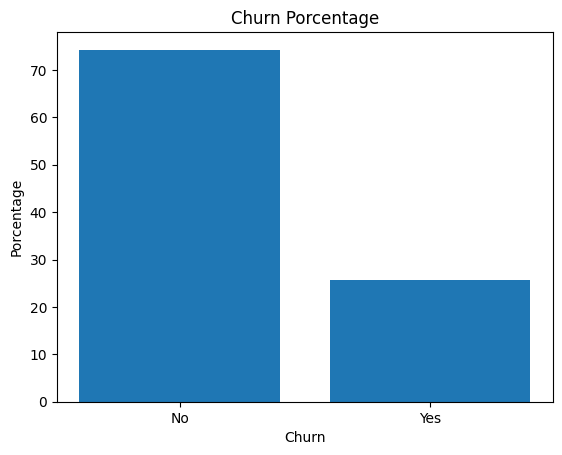

In [22]:
import matplotlib.pyplot as plt

plt.bar(porcentaje_churn.index, porcentaje_churn.values)
plt.xlabel('Churn')
plt.ylabel('Porcentage')
plt.title('Churn Porcentage')
plt.show()

In [37]:
plt.savefig("figure/Churn Porcentage.png")

<Figure size 640x480 with 0 Axes>

In [23]:
promedio_gasto = df.groupby('Churn')['account_Charges.Total'].mean().round(2)

promedio_gasto

,account_Charges.Total
Churn,
No,2540.44
Yes,1531.80


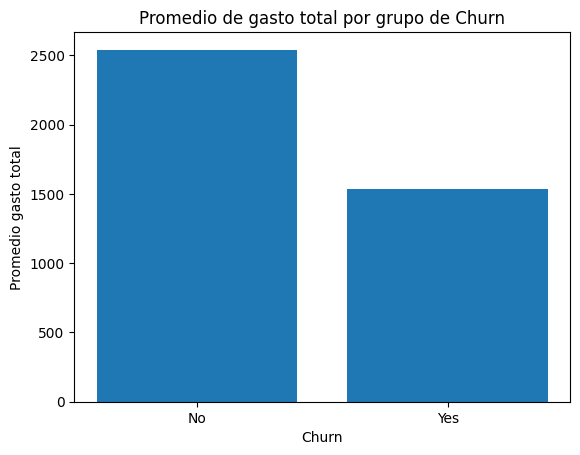

In [24]:
plt.bar(promedio_gasto.index, promedio_gasto.values)
plt.xlabel('Churn')
plt.ylabel('Promedio gasto total')
plt.title('Promedio de gasto total por grupo de Churn')
plt.show()

In [38]:
plt.savefig("figure/Promedio de gasto total por grupo de Churn.png")

<Figure size 640x480 with 0 Axes>

In [25]:
promedio_mensual = df.groupby('Churn')['account_Charges.Monthly'].mean().round(2)

promedio_mensual

,account_Charges.Monthly
Churn,
No,61.35
Yes,74.44


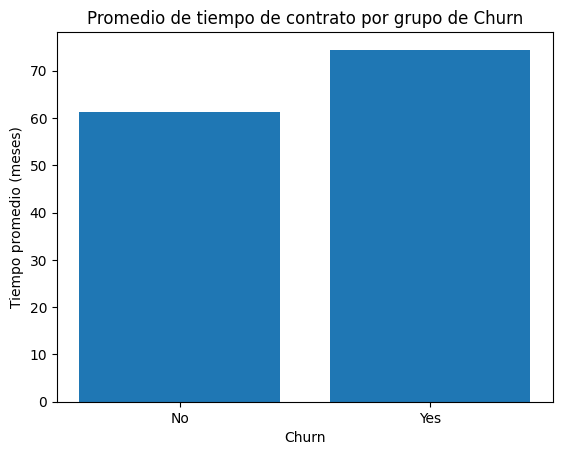

In [26]:
plt.bar(promedio_mensual.index, promedio_mensual.values)
plt.xlabel('Churn')
plt.ylabel('Tiempo promedio (meses)')
plt.title('Promedio de tiempo de contrato por grupo de Churn')
plt.show()

In [39]:
plt.savefig("figure/Promedio de tiempo de contrato por grupo de Churn.png")

<Figure size 640x480 with 0 Axes>

In [27]:
churn_by_gender = (
    df.groupby("customer_gender")["Churn"]
    .value_counts(normalize=True)
    .unstack()
    .fillna(0) * 100
).round(2)

print("Tasa de evasión por género (%)")
print(churn_by_gender)

Tasa de evasión por género (%)
Churn               No    Yes
customer_gender              
Female           73.86  26.14
Male             74.69  25.31


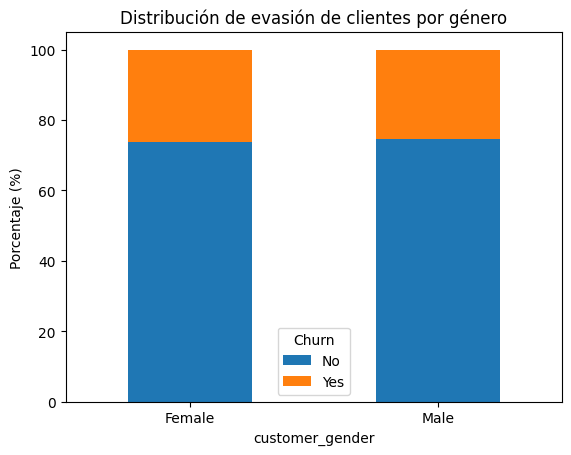

In [28]:
ig, ax = plt.subplots()
churn_by_gender.plot(kind="bar", stacked=True, ax=ax)

ax.set_ylabel("Porcentaje (%)")
ax.set_title("Distribución de evasión de clientes por género")
ax.legend(title="Churn")
plt.xticks(rotation=0)
plt.show()

In [40]:
plt.savefig("figure/Distribución de evasión de clientes por género.png")

<Figure size 640x480 with 0 Axes>

In [29]:
churn_by_contract = (
    df.groupby("account_Contract")["Churn"]
    .value_counts(normalize=True)
    .unstack()
    .fillna(0) * 100
).round(2)
print("Tasa de evasión por tipo de contrato (%)")
print(churn_by_contract)

Tasa de evasión por tipo de contrato (%)
Churn                No    Yes
account_Contract              
Month-to-month    58.68  41.32
One year          89.07  10.93
Two year          97.25   2.75


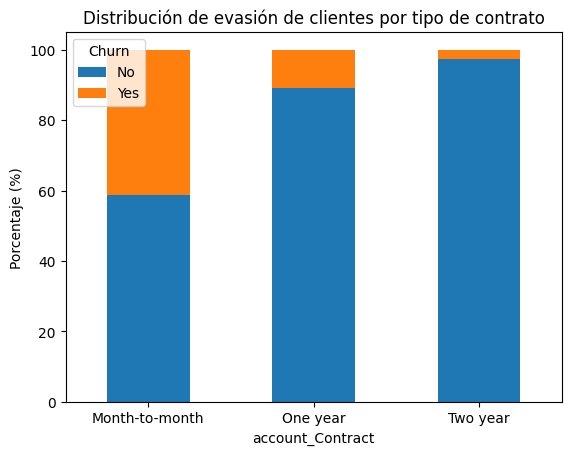

In [30]:
fig, ax = plt.subplots()
churn_by_contract.plot(kind="bar", stacked=True, ax=ax)

ax.set_ylabel("Porcentaje (%)")
ax.set_title("Distribución de evasión de clientes por tipo de contrato")
ax.legend(title="Churn")
plt.xticks(rotation=0)
plt.show()

In [41]:
plt.savefig("figure/Distribución de evasión de clientes por tipo de contrato.png")

<Figure size 640x480 with 0 Axes>

In [31]:
churn_by_payment = (
    df.groupby("account_PaymentMethod")["Churn"]
    .value_counts(normalize=True)
    .unstack()
    .fillna(0) * 100
).round(2)
print("Tasa de evasión por método de pago (%)")
print(churn_by_payment)

Tasa de evasión por método de pago (%)
Churn                         No    Yes
account_PaymentMethod                  
Bank transfer (automatic)  83.76  16.24
Credit card (automatic)    85.20  14.80
Electronic check           56.20  43.80
Mailed check               81.50  18.50


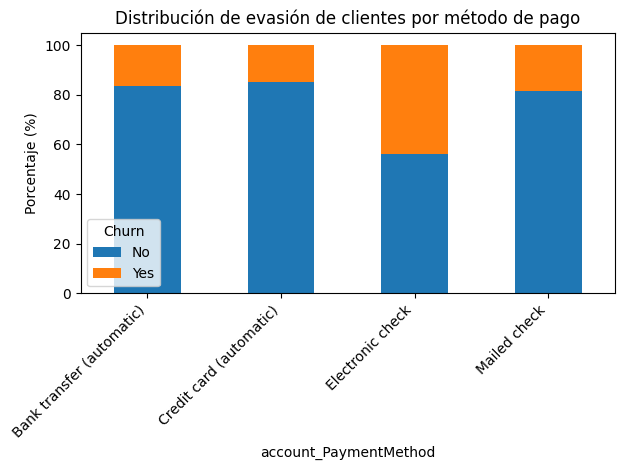

In [32]:
fig, ax = plt.subplots()
churn_by_payment.plot(kind="bar", stacked=True, ax=ax)

ax.set_ylabel("Porcentaje (%)")
ax.set_title("Distribución de evasión de clientes por método de pago")
ax.legend(title="Churn")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [42]:
plt.savefig("figure/Distribución de evasión de clientes por método de pago.png")

<Figure size 640x480 with 0 Axes>

In [33]:
df["Churn_num"] = df["Churn"].map({"No": 0, "Yes": 1})
churn_mean = df["Churn_num"].mean() * 100

print(f"Tasa global de Churn: {churn_mean:.2f}%")

Tasa global de Churn: 25.72%


In [34]:
churn_median = df["Churn_num"].median()

print(f"Mediana de Churn: {churn_median}")

Mediana de Churn: 0.0


In [35]:
churn_std = df["Churn_num"].std()

print(f"Desviación estándar de Churn: {churn_std:.4f}")

Desviación estándar de Churn: 0.4371


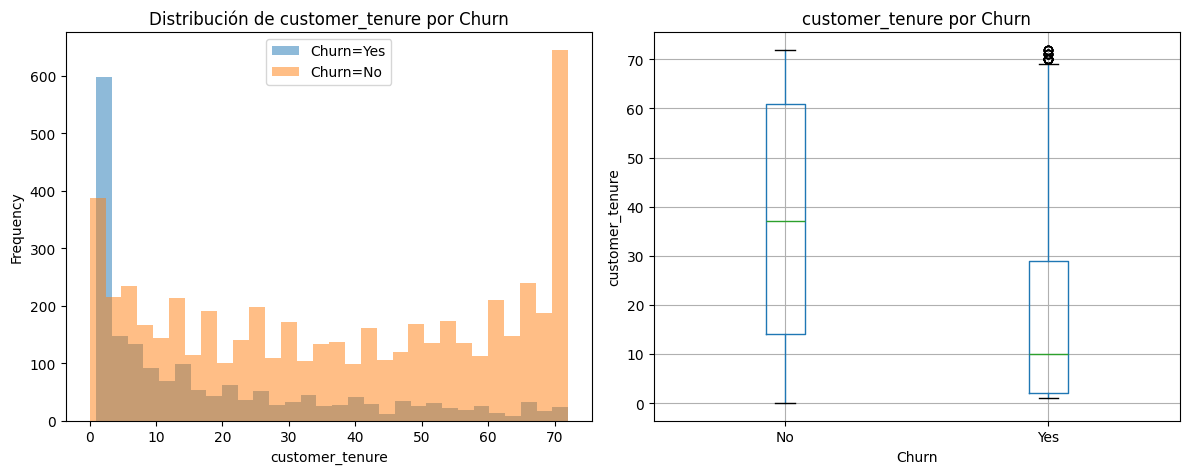

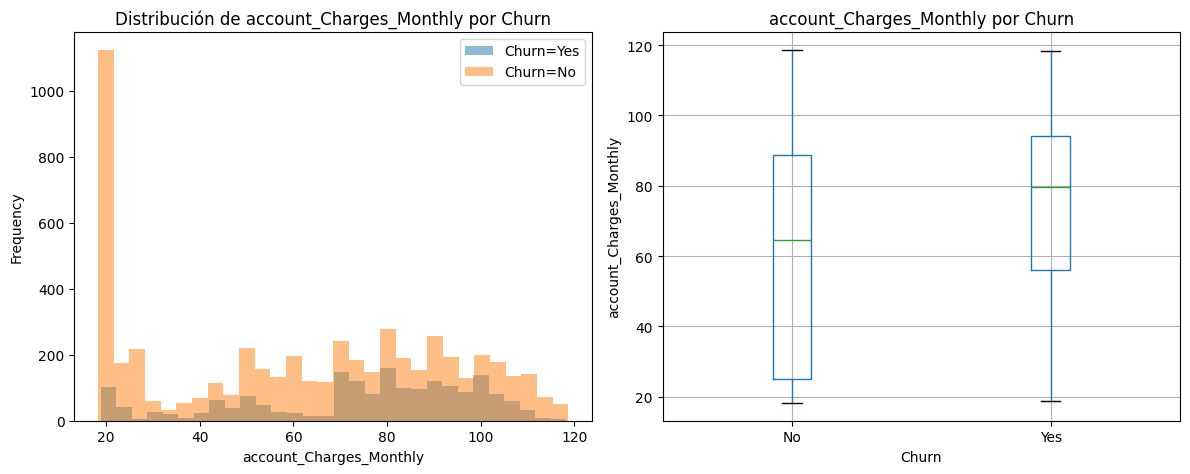

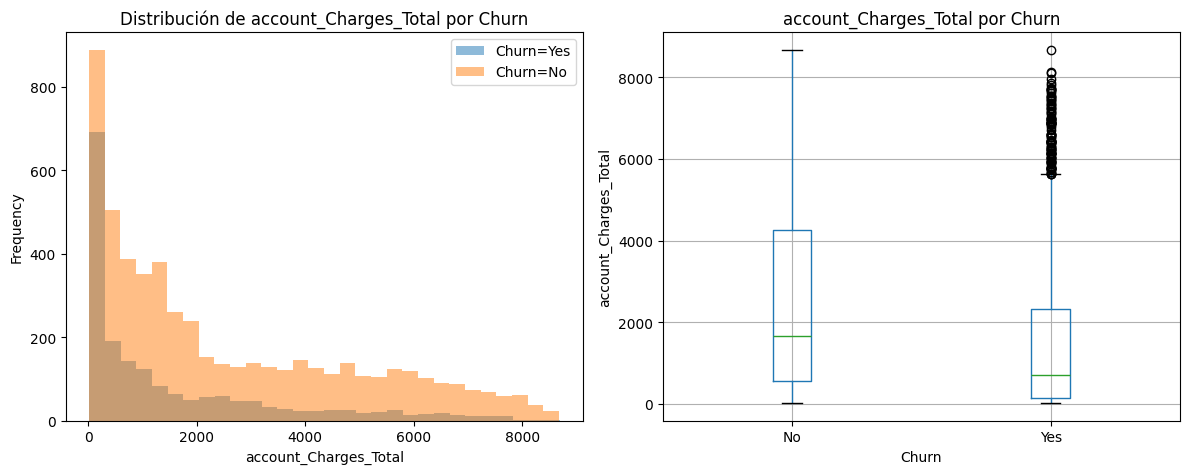

In [36]:
df.columns = [col.replace(".", "_") for col in df.columns]
numeric_vars = ["customer_tenure", "account_Charges_Monthly", "account_Charges_Total"]

for var in numeric_vars:
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    df[df["Churn"]=="Yes"][var].plot(kind="hist", bins=30, alpha=0.5, ax=axes[0], label="Churn=Yes")
    df[df["Churn"]=="No"][var].plot(kind="hist", bins=30, alpha=0.5, ax=axes[0], label="Churn=No")
    axes[0].set_title(f"Distribución de {var} por Churn")
    axes[0].set_xlabel(var)
    axes[0].legend()

    df.boxplot(column=var, by="Churn", ax=axes[1])
    axes[1].set_title(f"{var} por Churn")
    axes[1].set_ylabel(var)

    plt.suptitle("")
    plt.tight_layout()
    plt.show()

In [43]:
plt.savefig("figure/Distribución de var por Churn.png")

<Figure size 640x480 with 0 Axes>

#📄Informe final

Análisis de Evasión de Clientes (Churn)
  Introducción

El objetivo de este análisis fue comprender los factores que influyen en la evasión de clientes (Churn) en TelecomX.
La evasión representa la pérdida de clientes que deciden cancelar el servicio, un problema crítico en la industria de telecomunicaciones debido a la alta competencia.

Identificar patrones de comportamiento en los clientes que abandonan permitirá diseñar estrategias efectivas de retención, optimizando la fidelización y reduciendo pérdidas financieras.

 Limpieza y Tratamiento de Datos

Durante la etapa de preparación:

Se importaron los datos desde un archivo en formato JSON y se normalizaron a un DataFrame.

Se estandarizaron los nombres de las columnas, reemplazando . por _ para facilitar su uso en Python.

Se convirtieron a valores numéricos las variables continuas relevantes:

customer_tenure (tiempo de contrato en meses).

account_Charges_Monthly (cargo mensual).

account_Charges_Total (cargo total acumulado).

Se creó una variable binaria Churn_num (No=0, Yes=1) para poder calcular estadísticas.

 Análisis Exploratorio de Datos
1. Tasa Global de Churn

Se encontró que la tasa global de evasión es aproximadamente 25.72% (según la media de Churn_num).

El gráfico de barras mostró que la mayoría de los clientes permanecen, aunque existe un grupo importante que cancela.

📊 Gráfico: Conteo de clientes por estado de Churn

2. Churn por variables categóricas

Género: No se observaron diferencias significativas; hombres y mujeres presentan tasas similares de cancelación (~25–26%).

Tipo de contrato: Los contratos mensuales concentran la mayor tasa de evasión, en comparación con contratos anuales o de dos años.

Método de pago: Algunos métodos presentan mayor churn, particularmente manuales o con fricción en la experiencia de pago.

📊 Gráficos: Distribución de churn por género, contrato y método de pago

3. Variables numéricas por Churn

Tiempo de contrato (tenure): Los clientes con menos meses de antigüedad presentan una probabilidad más alta de cancelar, evidenciado en los boxplots.

Cargos mensuales (MonthlyCharges): Los clientes con cargos mensuales más elevados muestran mayor tendencia a churn.

Cargos totales (TotalCharges): Clientes que acumulan un gasto bajo total suelen ser los que cancelan más rápido (por tener poco tiempo en la compañía).

📊 Gráficos: Histogramas y boxplots de tenure, cargos mensuales y cargos totales, segmentados por churn

 Conclusiones e Insights

La tasa global de churn se encuentra en un nivel significativo, lo que indica que la evasión es un problema relevante.

Los contratos mensuales son el grupo con mayor riesgo de cancelación.

Los clientes con poco tiempo de antigüedad (tenure bajo) son más propensos a irse.

Existen diferencias en los métodos de pago, lo que sugiere que la experiencia de cobro influye en la retención.

El nivel de gasto mensual también es un factor a considerar: los clientes con cargos más altos tienen mayor probabilidad de cancelar.

 Recomendaciones

Retención temprana: Implementar programas de bienvenida y fidelización en los primeros meses de contrato (bonos, descuentos, beneficios extra).

Migración de contratos: Incentivar a los clientes de contrato mensual a pasar a contratos de mayor duración mediante descuentos o servicios adicionales.

Optimización de pagos: Promover métodos de pago automáticos y mejorar la experiencia en métodos con alta tasa de cancelación.

Segmentación de clientes en riesgo: Desarrollar un modelo predictivo de churn para identificar clientes con alto riesgo y aplicar estrategias personalizadas.

Revisión de precios y beneficios: Para clientes con cargos mensuales altos, ofrecer paquetes más flexibles o promociones que mejoren la percepción de valor.